# STROKE PREDICTION DATASET

## PREPROCESSING

In [36]:
#Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

In [37]:
dataset="https://raw.githubusercontent.com/niniengC/dataset/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(dataset,  header='infer', index_col=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [38]:
from sklearn.impute import SimpleImputer
 
print(f'Number of null values in the bmi column: {df.bmi.isnull().sum()}')
 
imp = SimpleImputer(strategy='mean')
df['bmi'] = imp.fit_transform(df[['bmi']])
 
print(f'Number of null values after: {df.bmi.isnull().sum()}')

Number of null values in the bmi column: 201
Number of null values after: 0


In [39]:
df=df.drop(['id'],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [40]:
from sklearn.preprocessing import LabelEncoder
 
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['ever_married'] = LabelEncoder().fit_transform(df['ever_married'])
df['work_type'] = LabelEncoder().fit_transform(df['work_type'])
df['Residence_type'] = LabelEncoder().fit_transform(df['Residence_type'])
df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## VISUALISASI DATA

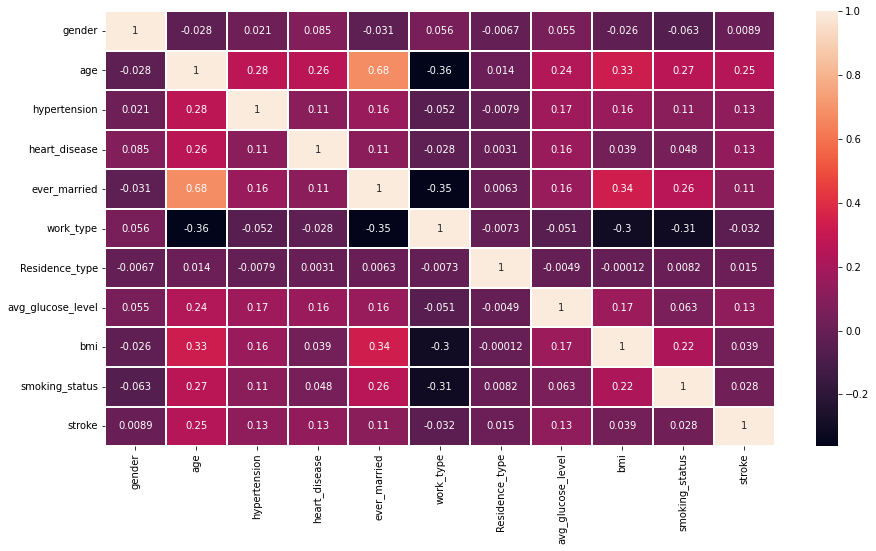

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [42]:
fig = ex.pie(df,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show()

Pada dataset tersebut sebanyak 
4.87% merupakan pasien pengidap stroke, 
sedangkan 95.13% dinyatakan dalam kondisi 
sehat.

Text(0.5, 1.0, 'Persebaran Penderita Stroke Berdasarkan Usia')

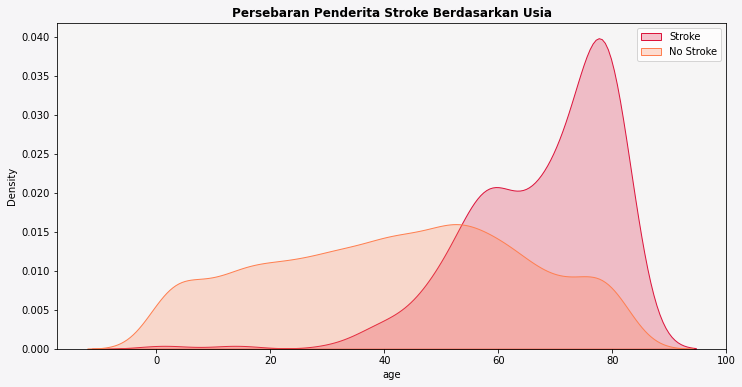

In [43]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(x=df.loc[df['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
# removing spines
# for i in ["top","right"]:
    # ax.spines[i].set_visible(False)
plt.title('Persebaran Penderita Stroke Berdasarkan Usia',weight='bold')

Usia rentan terkena stroke dimulai pada usia 
sekitar 40 tahun dan puncaknya pada usia 
sekitar 78 tahun.

Text(0.5, 1.0, 'Persebaran Penderita Stroke Berdasarkan BMI')

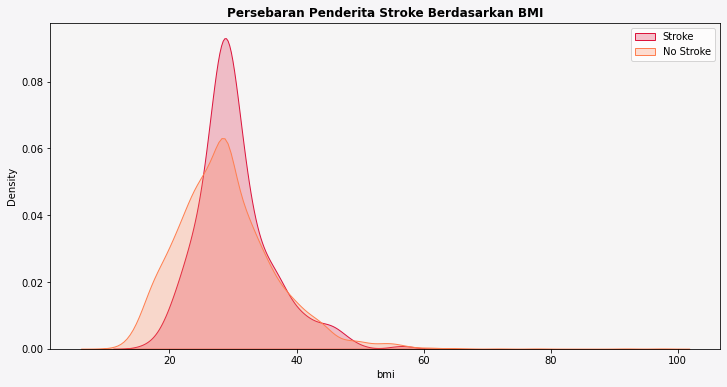

In [44]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(x=df.loc[df['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
# removing spines
# for i in ["top","right"]:
    # ax.spines[i].set_visible(False)
plt.title('Persebaran Penderita Stroke Berdasarkan BMI',weight='bold')

Dari grafik diatas, terlihat bahwa kepadatan orang yang kelebihan berat badan yang menderita stroke lebih banyak.

Text(0.5, 1.0, 'Persebaran Penderita Stroke Berdasarkan Avg. Glucose Level')

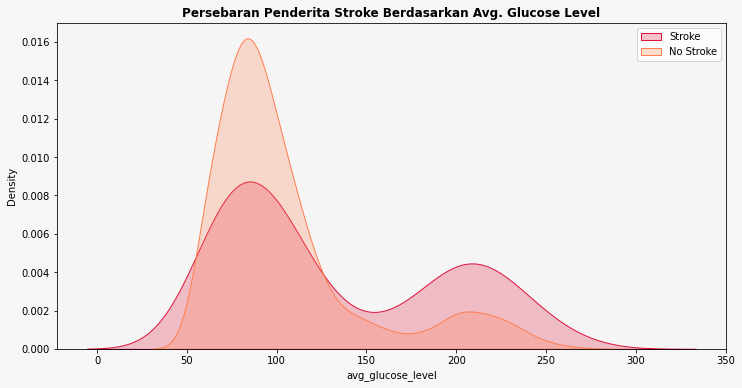

In [45]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(x=df.loc[df['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax.legend(loc = 'upper right')
# removing spines
# for i in ["top","right"]:
    # ax.spines[i].set_visible(False)
plt.title('Persebaran Penderita Stroke Berdasarkan Avg. Glucose Level',weight='bold')

Pasien yang terjangkit stroke 
memiliki kadar gula bervariasi. Pada kadar gula 
sekitar 100, jumlah penderita stroke cukup 
tinggi namun lebih kecil dibandingkan yang 
bukan penderita stroke. Saat kadar gula darah 
lebih dari 150, jumlah penderita stroke lebih 
tinggi dibandingkan yang bukan penderita 
stroke.

## NORMALISASI

In [46]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['age','avg_glucose_level'	,'bmi']
 
# Apply MinMaxScaler
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,2,1,0.132167,0.212981,2,0
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2,0
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2,0
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1,0


In [47]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler
standard = StandardScaler()
df[num_cols] = standard.fit_transform(df[num_cols])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,1,1
1,0,0.786070,0,0,1,3,0,2.121559,3.147952e-16,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,2,1
3,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,1,0,1,2,1,-0.494658,3.147952e-16,2,0
5106,0,1.670617,0,0,1,3,1,0.420775,1.442949e+00,2,0
5107,0,-0.363842,0,0,1,3,0,-0.511443,2.217363e-01,2,0
5108,1,0.343796,0,0,1,2,0,1.328257,-4.278451e-01,1,0


## MODELLING

In [48]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(["stroke"], axis=1).values
y = df["stroke"].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Naive Bayes GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print('accuracy_Naive Bayes: %.3f' %accuracy)
model_score=model.score(X_test, y_test)
print('model score Naive Bayes: %.3f' %model_score)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(classification_report(y_test, y_pred))
print('Confusion matrix for Naive Bayes\n',cm)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 0.883
model score Naive Bayes: 0.883
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       968
           1       0.21      0.43      0.28        54

    accuracy                           0.88      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.93      0.88      0.90      1022

Confusion matrix for Naive Bayes
 [[879  89]
 [ 31  23]]
precision_Naive Bayes: 0.586
recall_Naive Bayes: 0.667
f1-score_Naive Bayes : 0.607


### K-Nearest Neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1, 15):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("K = ",i)
    print('Confusion matrix KNN\n',cm)
    print('Accuracy_KNN: %.3f' %accuracy)
    print(classification_report(y_test, y_pred))
    print('Confusion matrix for KNN\n',cm)
    

K =  1
Confusion matrix KNN
 [[934  34]
 [ 52   2]]
Accuracy_KNN: 0.916
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.06      0.04      0.04        54

    accuracy                           0.92      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.90      0.92      0.91      1022

Confusion matrix for KNN
 [[934  34]
 [ 52   2]]
K =  2
Confusion matrix KNN
 [[966   2]
 [ 54   0]]
Accuracy_KNN: 0.945
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for KNN
 [[966   2]
 [ 54   0]]
K =  3
Confusion matrix KNN
 [[959   9]
 [ 53   1]]
Accuracy_KNN: 0.939
              precision    recal

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

K =  8
Confusion matrix KNN
 [[968   0]
 [ 54   0]]
Accuracy_KNN: 0.947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for KNN
 [[968   0]
 [ 54   0]]
K =  9
Confusion matrix KNN
 [[966   2]
 [ 54   0]]
Accuracy_KNN: 0.945
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for KNN
 [[966   2]
 [ 54   0]]
K =  10
Confusion matrix KNN
 [[968   0]
 [ 54   0]]
Accuracy_KNN: 0.947
              precision    reca

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

K =  13
Confusion matrix KNN
 [[968   0]
 [ 54   0]]
Accuracy_KNN: 0.947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for KNN
 [[968   0]
 [ 54   0]]
K =  14
Confusion matrix KNN
 [[968   0]
 [ 54   0]]
Accuracy_KNN: 0.947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for KNN
 [[968   0]
 [ 54   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

### Decission tree

#### Gini

In [53]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy Decision Tree: %.3f' %accuracy)
model_score=model.score(X_test, y_test)
print('model score Decision Tree: %.3f' %model_score)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(classification_report(y_test, y_pred))
print('Confusion matrix for Decision Tree\n',cm)
print('precision_Decision Tree: %.3f' %precision)
print('recall_Decision Tree: %.3f' %recall)
print('f1-score_Decision Tree : %.3f' %f1)

Accuracy Decision Tree: 0.914
model score Decision Tree: 0.947
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.13      0.11      0.12        54

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.54      1022
weighted avg       0.91      0.91      0.91      1022

Confusion matrix for Decision Tree
 [[928  40]
 [ 48   6]]
precision_Decision Tree: 0.541
recall_Decision Tree: 0.535
f1-score_Decision Tree : 0.537


#### Entropy

In [54]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy Decision Tree: %.3f' %accuracy)
model_score=model.score(X_test, y_test)
print('model score Decision Tree: %.3f' %model_score)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(classification_report(y_test, y_pred))
print('Confusion matrix for Decision Tree\n',cm)
print('precision_Decision Tree: %.3f' %precision)
print('recall_Decision Tree: %.3f' %recall)
print('f1-score_Decision Tree : %.3f' %f1)

Accuracy Decision Tree: 0.917
model score Decision Tree: 0.947
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.14      0.11      0.12        54

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022

Confusion matrix for Decision Tree
 [[931  37]
 [ 48   6]]
precision_Decision Tree: 0.545
recall_Decision Tree: 0.536
f1-score_Decision Tree : 0.540


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
rf = RandomForestClassifier()

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy Random Forest: %.3f' %accuracy)
model_score=model.score(X_test, y_test)
print('model score Random Forest: %.3f' %model_score)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(classification_report(y_test, y_pred))
print('Confusion matrix for Random Forest\n',cm)
print('precision_Random Forest: %.3f' %precision)
print('recall_Random Forest: %.3f' %recall)
print('f1-score_Random Forest : %.3f' %f1)

Accuracy Random Forest: 0.946
model score Random Forest: 0.947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Confusion matrix for Random Forest
 [[967   1]
 [ 54   0]]
precision_Random Forest: 0.474
recall_Random Forest: 0.499
f1-score_Random Forest : 0.486
